In [64]:
import pandas as pd
import string

In [6]:
## scavenger_models.py werkt niet met het omzetten naar een df
from scavenger_models import *

In [2]:
from peewee import *

database = MySQLDatabase('scavenger', **{'charset': 'utf8', 'sql_mode': 'PIPES_AS_CONCAT', 'use_unicode': True, 'host': '165.22.199.122', 'user': 'remote', 'password': 'EtrPCEc0jt'})

class UnknownField(object):
    def __init__(self, *_, **__): pass

class BaseModel(Model):
    class Meta:
        database = database

class Images(BaseModel):
    street = TextField(null=True)
    title = TextField(null=True)
    url = TextField(null=True)
    usable = IntegerField(null=True)
    year = IntegerField(null=True)

    class Meta:
        table_name = 'images'

class Locations(BaseModel):
    dis_lat = FloatField(null=True)
    dis_long = FloatField(null=True)
    index = BigIntegerField(index=True, null=True)
    map_avg_lat = FloatField(null=True)
    map_avg_long = FloatField(null=True)
    map_bot_lat = FloatField(null=True)
    map_bot_long = FloatField(null=True)
    map_top_lat = FloatField(null=True)
    map_top_long = FloatField(null=True)
    nav_lat = FloatField(null=True)
    nav_long = FloatField(null=True)
    street = CharField(primary_key=True)

    class Meta:
        table_name = 'locations'

class UserTable(BaseModel):
    user_current_score = IntegerField(null=True)
    user_date = DateTimeField(null=True)
    user_id = AutoField()
    user_location_lat = DecimalField()
    user_location_long = DecimalField()
    user_total_score = IntegerField(null=True)

    class Meta:
        table_name = 'user_table'

class UserPictures(BaseModel):
    user_pictures_datetime = DateTimeField()
    user_pictures_image = ForeignKeyField(column_name='user_pictures_image_id', field='id', model=Images)
    user_pictures_location_lat = DecimalField()
    user_pictures_location_long = DecimalField()
    user_pictures_user = ForeignKeyField(column_name='user_pictures_user_id', field='user_id', model=UserTable)

    class Meta:
        table_name = 'user_pictures'
        indexes = (
            (('user_pictures_user', 'user_pictures_location_lat', 'user_pictures_location_long', 'user_pictures_image', 'user_pictures_datetime'), True),
        )
        primary_key = CompositeKey('user_pictures_datetime', 'user_pictures_image', 'user_pictures_location_lat', 'user_pictures_location_long', 'user_pictures_user')

In [3]:
## All titles of images into DF

all_images_titles = (Images
                .select(Images.id, Images.title) 
                .dicts()
                )

#df_titles = pd.DataFrame(all_images_titles)

In [4]:
df_titles = pd.DataFrame(all_images_titles)

In [67]:
## remove punctuation
df_titles['cleaned_title'] = df_titles['title'].apply(lambda x:''.join([i.lower() for i in x if i not in string.punctuation]))

In [68]:
df_titles

,id,title,cleaned_title,words
0,0,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[Arbeiderswoningen, woningbouwvereniging, mgr,..."
1,1,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[Arbeiderswoningen, woningbouwvereniging, mgr,..."
2,2,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[Arbeiderswoningen, woningbouwvereniging, mgr,..."
3,3,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[Arbeiderswoningen, woningbouwvereniging, mgr,..."
4,4,Woningen ontworpen door architect Jan van den ...,woningen ontworpen door architect jan van den ...,"[Woningen, ontworpen, architect, Jan, den, Ber..."
5,5,Woningen ontworpen door architect Jan van den ...,woningen ontworpen door architect jan van den ...,"[Woningen, ontworpen, architect, Jan, den, Ber..."
6,6,Woningen van woningbouwvereniging mgr. Prinsen...,woningen van woningbouwvereniging mgr prinsen ...,"[Woningen, woningbouwvereniging, mgr, Prinsen,..."
7,7,Vijand op de loer bij talentenjacht PSV. Assit...,vijand op de loer bij talentenjacht psv assite...,"[Vijand, loer, talentenjacht, PSV, Assitenttra..."
8,8,Sloopafval Parva Domus in eigen park gedumpt.,sloopafval parva domus in eigen park gedumpt,"[Sloopafval, Parva, Domus, eigen, park, gedumpt]"
9,9,Monumentaal Huize Muyserick wordt luxe kantoor...,monumentaal huize muyserick wordt luxe kantoor...,"[Monumentaal, Huize, Muyserick, luxe, kantoorv..."


In [6]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = (stopwords.words('dutch')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20190298\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
stop_words[:5]

['de', 'en', 'van', 'ik', 'te']

In [69]:
df_titles['words'] = [[word for word in sentence if word not in stop_words] for sentence in df_titles['cleaned_title'].str.split()]

In [70]:
df_titles

,id,title,cleaned_title,words
0,0,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[arbeiderswoningen, woningbouwvereniging, mgr,..."
1,1,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[arbeiderswoningen, woningbouwvereniging, mgr,..."
2,2,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[arbeiderswoningen, woningbouwvereniging, mgr,..."
3,3,Arbeiderswoningen van woningbouwvereniging mgr...,arbeiderswoningen van woningbouwvereniging mgr...,"[arbeiderswoningen, woningbouwvereniging, mgr,..."
4,4,Woningen ontworpen door architect Jan van den ...,woningen ontworpen door architect jan van den ...,"[woningen, ontworpen, architect, jan, den, ber..."
5,5,Woningen ontworpen door architect Jan van den ...,woningen ontworpen door architect jan van den ...,"[woningen, ontworpen, architect, jan, den, ber..."
6,6,Woningen van woningbouwvereniging mgr. Prinsen...,woningen van woningbouwvereniging mgr prinsen ...,"[woningen, woningbouwvereniging, mgr, prinsen,..."
7,7,Vijand op de loer bij talentenjacht PSV. Assit...,vijand op de loer bij talentenjacht psv assite...,"[vijand, loer, talentenjacht, psv, assitenttra..."
8,8,Sloopafval Parva Domus in eigen park gedumpt.,sloopafval parva domus in eigen park gedumpt,"[sloopafval, parva, domus, eigen, park, gedumpt]"
9,9,Monumentaal Huize Muyserick wordt luxe kantoor...,monumentaal huize muyserick wordt luxe kantoor...,"[monumentaal, huize, muyserick, luxe, kantoorv..."


### Topic Modeling

In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 

In [74]:
## Create the dictonary and Corpys needed for Topic modeling
## Gensim creates a unique id for each word in the document. The produced corpus is [word_id, word_frequency]
# Create Dictionary
id2word = corpora.Dictionary(df_titles['words'])

# Create Corpus
texts = df_titles['words']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [75]:
corpus[:1]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]

In [11]:
## building the topic modeling
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2word,
                                            num_topics = 10,
                                            random_state = 100,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 10,
                                            alpha = 'auto',
                                            per_word_topics= True)

## view the topics in LDA model

In [13]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"Binnendieze" + 0.026*"pand" + 0.022*"oude" + 0.017*"brug" + '
  '0.017*"Engelbert" + 0.016*"H" + 0.015*"Antonius" + 0.015*"leerlingen" + '
  '0.015*"woningen" + 0.015*"Interieur"'),
 (1,
  '0.207*"Bokhoven" + 0.104*"Empel" + 0.030*"Frans" + 0.012*"Aan" + '
  '0.012*"werk" + 0.011*"Opname" + 0.011*"Groep" + 0.010*"Jo" + 0.010*"nummer" '
  '+ 0.010*"autos"'),
 (2,
  '0.137*"De" + 0.027*"Van" + 0.014*"huis" + 0.013*"Rosmalen" + 0.013*"Maas" + '
  '0.011*"kinderen" + 0.011*"Berg" + 0.010*"Hinthamerstraat" + 0.010*"boven" + '
  '0.010*"familie"'),
 (3,
  '0.107*"Portret" + 0.032*"den" + 0.028*"ter" + 0.024*"In" + 0.015*"Boekel" + '
  '0.013*"nr" + 0.012*"architect" + 0.011*"A" + 0.010*"woning" + '
  '0.010*"gesloopt"'),
 (4,
  '0.071*"kerk" + 0.039*"links" + 0.035*"rechts" + 0.028*"Op" + 0.027*"gezien" '
  '+ 0.026*"vanaf" + 0.025*"nieuwe" + 0.022*"achtergrond" + 0.017*"richting" + '
  '0.013*"Links"'),
 (5,
  '0.048*"Het" + 0.034*"sHertogenbosch" + 0.033*"Bossche" + '
  '0.0

In [14]:
# Measure of quality of model (lower the beter)
lda_model.log_perplexity(corpus)

-10.882991092224126

In [17]:
coherence_model_lda = CoherenceModel(model = lda_model, texts = df_titles['words'])
#ry = id2word, coherence = 'c_v'
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.4256017238703175

### Optimal numbers of topics for LDA

In [45]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [76]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df_titles['words'], start=2, limit=40, step=6)

Text(0, 0.5, 'Coherence score')

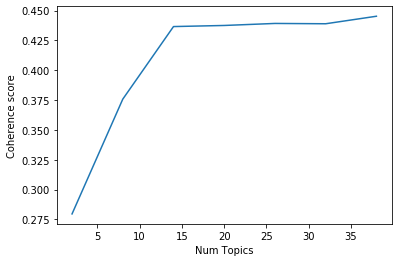

In [77]:
limit = 40; start = 2; step = 6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

In [78]:
coherence_values

[0.27961709244102767,
 0.37576129864129826,
 0.43657464863585643,
 0.4374971664211521,
 0.43919398276777927,
 0.4389286669169521,
 0.44522415559953904]

In [83]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=3))

[(13, '0.050*"kerk" + 0.027*"plattegrond" + 0.026*"gedeelte"'),
 (17, '0.053*"café" + 0.050*"brabanthallen" + 0.043*"rosmalen"'),
 (14, '0.037*"ter" + 0.034*"vught" + 0.027*"foto"'),
 (4, '0.081*"exterieur" + 0.040*"komt" + 0.032*"interieur"'),
 (25, '0.157*"sint" + 0.143*"jan" + 0.028*"leerlingen"'),
 (24, '0.076*"kinderen" + 0.056*"ziekenhuis" + 0.036*"detail"'),
 (1, '0.099*"brabant" + 0.024*"zon" + 0.024*"hotel"'),
 (2, '0.067*"t" + 0.041*"tweede" + 0.027*"opening"'),
 (3, '0.093*"nieuwe" + 0.054*"week" + 0.044*"nv"'),
 (7, '0.039*"gelegenheid" + 0.037*"ter" + 0.031*"rob"'),
 (15, '0.093*"gemaakt" + 0.054*"opname" + 0.050*"piet"'),
 (23, '0.065*"empel" + 0.031*"begint" + 0.029*"vrouw"'),
 (21, '0.044*"school" + 0.041*"nr" + 0.031*"snel"'),
 (12, '0.051*"willem" + 0.046*"wel" + 0.036*"station"'),
 (20, '0.075*"burgemeester" + 0.062*"bokhoven" + 0.058*"rechts"'),
 (6, '0.128*"den" + 0.117*"bosch" + 0.067*"gisteren"'),
 (18, '0.104*"gezien" + 0.061*"richting" + 0.061*"vanaf"'),
 (11, 

In [61]:
df_titles['words'][8]

['Sloopafval', 'Parva', 'Domus', 'eigen', 'park', 'gedumpt']

### Visualize topic keywords

In [81]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

C:\Users\20190298\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.250999 -0.127925       1        1  6.574378
8     -0.125468 -0.236985       2        1  6.352270
0      0.282232 -0.011267       3        1  6.216714
13     0.125986  0.156096       4        1  5.527196
20     0.112924 -0.168402       5        1  4.692389
5      0.210660  0.010483       6        1  4.528959
16    -0.082750  0.091117       7        1  4.282188
14    -0.025579 -0.077842       8        1  4.051939
19     0.050192  0.084459       9        1  3.981825
7     -0.100195 -0.136289      10        1  3.851315
10    -0.010414 -0.016774      11        1  3.527243
24    -0.068441 -0.028747      12        1  3.452897
25     0.076206  0.071698      13        1  3.433878
22    -0.025943  0.010699      14        1  3.432745
21    -0.069437  0.181702      15        1  3.393446
11     0.005431  0.023875      16        1  3.199995
1     -0.039541  0.016656      17        1  3.115455
12    -0.015411  0.095626      18        1  3.110445
6     -0.105078 -0.032639      19        1  3.092914
23    -0.067780 -0.002712      20        1  3.030227
2     -0.067639 -0.022912      21        1  2.981535
17    -0.067883 -0.041656      22        1  2.968081
15    -0.089291  0.081212      23        1  2.910816
9     -0.051468 -0.048142      24        1  2.898309
3     -0.111248  0.055950      25        1  2.875220
4      0.008934  0.072723      26        1  2.517621, topic_info=     Category         Freq            Term        Total  loglift  logprob
673   Default  4183.000000            sint  4183.000000  30.0000  30.0000
1246  Default  3519.000000         portret  3519.000000  29.0000  29.0000
4     Default  3424.000000             jan  3424.000000  28.0000  28.0000
664   Default  3576.000000          gezien  3576.000000  27.0000  27.0000
3     Default  3466.000000             den  3466.000000  26.0000  26.0000
14    Default  1912.000000           bosch  1912.000000  25.0000  25.0000
116   Default  2569.000000           vanaf  2569.000000  24.0000  24.0000
604   Default  1530.000000    burgemeester  1530.000000  23.0000  23.0000
1591  Default  1380.000000         brabant  1380.000000  22.0000  22.0000
110   Default  2160.000000          nieuwe  2160.000000  21.0000  21.0000
1099  Default  1973.000000        richting  1973.000000  20.0000  20.0000
1701  Default  1193.000000         gemaakt  1193.000000  19.0000  19.0000
582   Default  1204.000000        bokhoven  1204.000000  18.0000  18.0000
541   Default  1839.000000            kerk  1839.000000  17.0000  17.0000
201   Default  1288.000000        kinderen  1288.000000  16.0000  16.0000
75    Default  4278.000000          rechts  4278.000000  15.0000  15.0000
95    Default  3316.000000         tijdens  3316.000000  14.0000  14.0000
131   Default   885.000000       exterieur   885.000000  13.0000  13.0000
42    Default  4083.000000           links  4083.000000  12.0000  12.0000
196   Default   858.000000        gisteren   858.000000  11.0000  11.0000
102   Default  1354.000000            huis  1354.000000  10.0000  10.0000
2092  Default   880.000000               t   880.000000   9.0000   9.0000
550   Default  1727.000000             ter  1727.000000   8.0000   8.0000
728   Default  1200.000000            pand  1200.000000   7.0000   7.0000
384   Default  1533.000000          eerste  1533.000000   6.0000   6.0000
966   Default   820.000000           empel   820.000000   5.0000   5.0000
2610  Default   811.000000      ziekenhuis   811.000000   4.0000   4.0000
2     Default   784.000000            berg   784.000000   3.0000   3.0000
1352  Default  2285.000000  shertogenbosch  2285.000000   2.0000   2.0000
697   Default  1011.000000           markt  1011.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
2815  Topic26    66.672844      genodigden    67.885376   3.6638  -5.0518
5366  Topic26    63.894238     